In [64]:
import numpy as np
from utils import load_from_pickle
import matplotlib.pyplot as plt
from classes.Robot import Robot
import numpy as np

In [65]:
robot = Robot()

Available serial ports:
  - /dev/ttyS31
  - /dev/ttyS30
  - /dev/ttyS29
  - /dev/ttyS28
  - /dev/ttyS27
  - /dev/ttyS26
  - /dev/ttyS25
  - /dev/ttyS24
  - /dev/ttyS23
  - /dev/ttyS22
  - /dev/ttyS21
  - /dev/ttyS20
  - /dev/ttyS19
  - /dev/ttyS18
  - /dev/ttyS17
  - /dev/ttyS16
  - /dev/ttyS15
  - /dev/ttyS14
  - /dev/ttyS13
  - /dev/ttyS12
  - /dev/ttyS11
  - /dev/ttyS10
  - /dev/ttyS9
  - /dev/ttyS8
  - /dev/ttyS7
  - /dev/ttyS6
  - /dev/ttyS5
  - /dev/ttyS4
  - /dev/ttyS3
  - /dev/ttyS2
  - /dev/ttyS1
  - /dev/ttyS0


Exception: Failed to connect via serial, no devices found.

In [ ]:
data = load_from_pickle("robot_data.pkl")

Data loaded from robot_data.pkl


In [ ]:
timestamps_s = np.array(data["timestamps_s"], dtype=np.float64)
waypoints_s = np.array(data["waypoints_s"], dtype=np.float64) # (N,)
joint_deg    = np.array(data["joint_deg"], dtype=np.float64) # (N, 4)
xyz_mm       = np.array(data["xyz_mm"], dtype=np.float64)
waypoints_deg = np.array(data["waypoints_deg"], dtype=np.float64)
traj_time_s  = np.array(data["traj_time_s"], dtype=np.float64)
poll_dt      = np.array(data["poll_dt"], dtype=np.float64)

In [ ]:
joint_deg

array([[ -0.08789062,   0.43945312,   1.66992188,   0.43945312],
       [ -0.08789062,   0.43945312,   1.66992188,   0.3515625 ],
       [ -0.08789062,   0.43945312,   1.66992188,   0.08789062],
       [ -0.08789062,   0.52734375,   1.66992188,  -0.3515625 ],
       [ -0.08789062,   0.61523438,   1.93359375,  -1.0546875 ],
       [ -0.08789062,   0.87890625,   2.90039062,  -1.84570312],
       [ -0.08789062,   1.0546875 ,   4.13085938,  -2.8125    ],
       [ -0.08789062,   1.40625   ,   5.44921875,  -4.13085938],
       [ -0.08789062,   1.66992188,   7.11914062,  -5.53710938],
       [ -0.08789062,   2.02148438,   9.05273438,  -7.11914062],
       [ -0.08789062,   2.4609375 ,  11.16210938,  -9.05273438],
       [ -0.08789062,   2.8125    ,  13.44726562, -11.07421875],
       [ -0.08789062,   3.33984375,  15.8203125 , -13.18359375],
       [ -0.08789062,   3.77929688,  18.19335938, -15.46875   ],
       [ -0.08789062,   4.30664062,  20.56640625, -17.578125  ],
       [ -0.08789062,   4

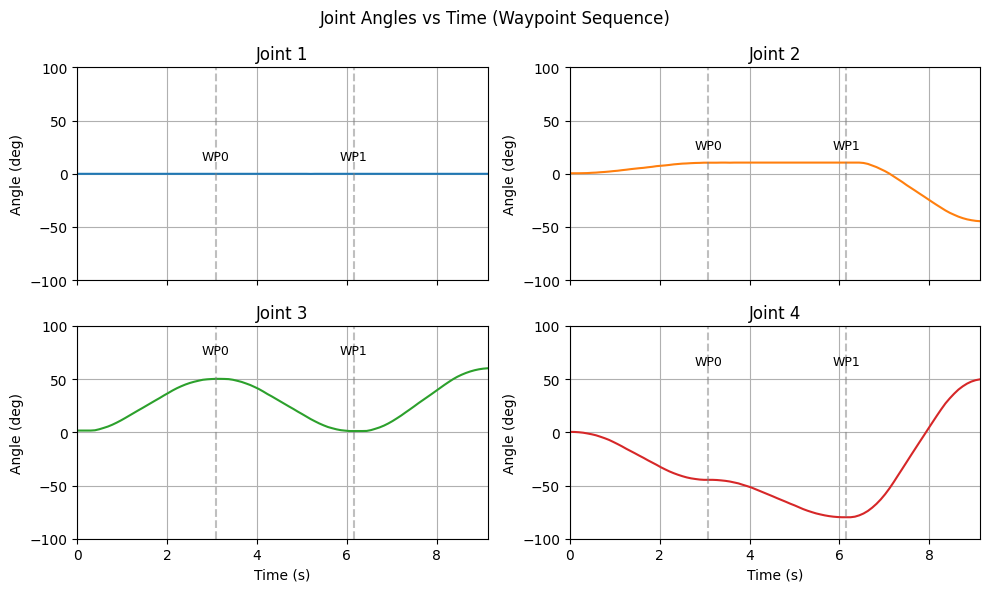

In [87]:
# --- Plot 1: Joint angles vs. time ---
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True)
titles = ["Joint 1", "Joint 2", "Joint 3", "Joint 4"]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

for idx, ax in enumerate(axes.ravel()):
  ax.plot(timestamps_s, joint_deg[:, idx], label=titles[idx], color=colors[idx])
  ax.set_xlim(0, timestamps_s.max())
  ax.set_ylim(-100, 100)
  ax.set_title(titles[idx])
  ax.set_ylabel("Angle (deg)")
  ax.grid(True)

  # Mark waypoints on time axis
  for i, t in enumerate(waypoints_s):
    ax.axvline(x=t, color="gray", linestyle="--", alpha=0.5)
    # Use the max value of the current joint for annotation positioning
    y_pos = joint_deg[:, idx].max()
    ax.annotate(
        f"WP{i}",
        (t, y_pos),
        xytext=(0, 10),
        textcoords="offset points",
        ha="center",
        fontsize=9,
    )

axes[1, 0].set_xlabel("Time (s)")
axes[1, 1].set_xlabel("Time (s)")
fig.suptitle("Joint Angles vs Time (Waypoint Sequence)")
plt.tight_layout()
plt.show()
plt.close(fig)

In [ ]:
xyz_mm[:, 0]

array([ -91.67400429,  -77.80760922,  -42.24491428,   21.90071943,
        -35.1464129 ,   16.58867355,  141.61195954,    5.66741572,
       -123.86484114,  152.61288315,  -29.686291  ,  123.28378068,
         46.58655647,  -31.60784039,  -32.30289519, -246.22519564,
        -80.35110063, -285.07367244,   58.98236457,  -45.52560448,
        243.54560783,  198.51844054,  219.90361193,  241.88862842,
        -77.78392418,  -48.94030372,    6.25368725, -146.83332985,
       -303.18928921, -346.08927846, -338.42767883, -324.61448404,
       -310.18722774, -322.6970266 , -326.85897024, -303.45346889,
       -169.3679867 ,  -73.77742782, -146.46495085,   48.46402222,
       -295.35191115,  -84.79799815, -111.95592445, -107.72704512,
       -130.71271607, -119.85346282, -119.31645282,  -97.08924846,
       -145.75750718,  -84.1531059 , -115.37640191, -185.47683188,
         -6.34022496, -185.72251526, -155.26552868,  -95.97168182,
          9.32075051, -323.54915324,  -86.78783193, -105.16901

In [ ]:
xyz_mm[:, 2]

array([   5.5779949 ,  -11.61274563,  -37.4499415 ,  -50.75238198,
         25.45630417,  148.47188036,   64.06166365,  -80.60866832,
         84.342843  ,  112.37590025,   -6.90992878,  148.28062782,
       -129.61228745,   70.23081332, -157.38928446,  100.42609733,
         59.36791184,  229.65268799,  322.92256693,  234.08171332,
        347.7250289 ,   25.55102223,  124.00803069, -214.41118239,
       -191.75129964,  -42.96004659, -153.99722813, -230.58766873,
       -137.22062261,  -16.65142936,   96.07104336,  112.85185897,
        158.74389254,  119.33725881,  118.81190723,  -28.81137784,
       -105.35153513,    8.66324278,  -14.1671466 ,   48.96134326,
        203.23329674, -190.46698423,  124.62251575,  151.06201715,
       -210.51469571,  244.94177372,   -2.08307041, -126.2498584 ,
        280.27091248, -138.4993326 ,    7.02066911,  216.54790141,
       -180.68913299,  141.74530689,   98.67003323, -182.94066131,
        243.67920747,   17.05401638,  -74.50138463,   38.90605

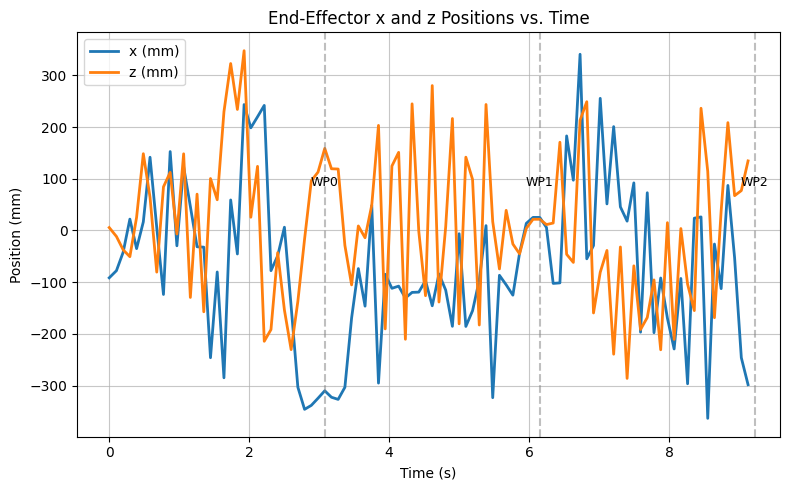

In [91]:
# --- Plot 2: x and z vs. time ---
plt.figure(figsize=(8, 5))
plt.plot(timestamps_s, xyz_mm[:, 0], linewidth=2, markersize=8, label="x (mm)")
plt.plot(timestamps_s, xyz_mm[:, 2], linewidth=2, markersize=8, label="z (mm)")
# plt.plasmaset_xlim(0, timestamps_s.max())
# plt.set_ylim(-100, 100)

# Mark waypoints on time axis
for i, t in enumerate(waypoints_s):
    plt.axvline(x=t, color="gray", linestyle="--", alpha=0.5)
    plt.annotate(
        f"WP{i}",
        (t, max(waypoints_deg[:, 0].max(), waypoints_deg[:, 2].max())),
        xytext=(0, 10),
        textcoords="offset points",
        ha="center",
        fontsize=9,
    )
    # Use the max value of the current joint for annotation positioning
    y_pos = joint_deg[:, idx].max()
    ax.annotate(
        f"WP{i}",
        (t, y_pos),
        xytext=(0, 10),
        textcoords="offset points",
        ha="center",
        fontsize=9,
    )

plt.xlabel("Time (s)")
plt.ylabel("Position (mm)")
plt.title("End-Effector x and z Positions vs. Time")
plt.grid(True, alpha=0.7)
plt.legend()
plt.tight_layout()

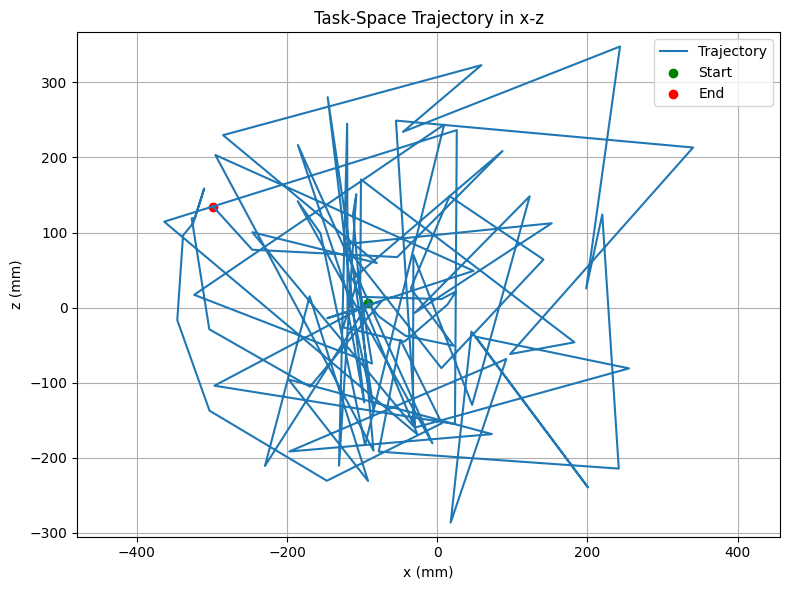

In [83]:
# --- Plot 3: Task-space trajectory (x-z) ---
plt.figure(figsize=(8, 6))
# plt.figure(figsize=(6, 5))
plt.plot(xyz_mm[:, 0], xyz_mm[:, 2], "-", label="Trajectory")
plt.scatter(xyz_mm[0, 0], xyz_mm[0, 2], c="g", label="Start")
plt.scatter(xyz_mm[-1, 0], xyz_mm[-1, 2], c="r", label="End")

# # Mark each waypoint clearly
# for i, (x, z) in enumerate(zip(xyz_data[:, 0], xyz_data[:, 2])):
#     if i == 0:
#         plt.scatter(x, z, c="green", s=100, label="Start", zorder=5)
#     elif i == len(xyz_data) - 1:
#         plt.scatter(x, z, c="red", s=100, label="End", zorder=5)
#     else:
#         plt.scatter(x, z, c="orange", s=80, zorder=5)
#     plt.annotate(
#         f"WP{i}", (x, z), xytext=(5, 5), textcoords="offset points", fontsize=10
#     )

plt.xlabel("x (mm)")
plt.ylabel("z (mm)")
plt.gca().set_aspect("equal", adjustable="box")
plt.grid(True)
plt.legend()
plt.axis("equal")
plt.title("Task-Space Trajectory in x-z")
plt.tight_layout()

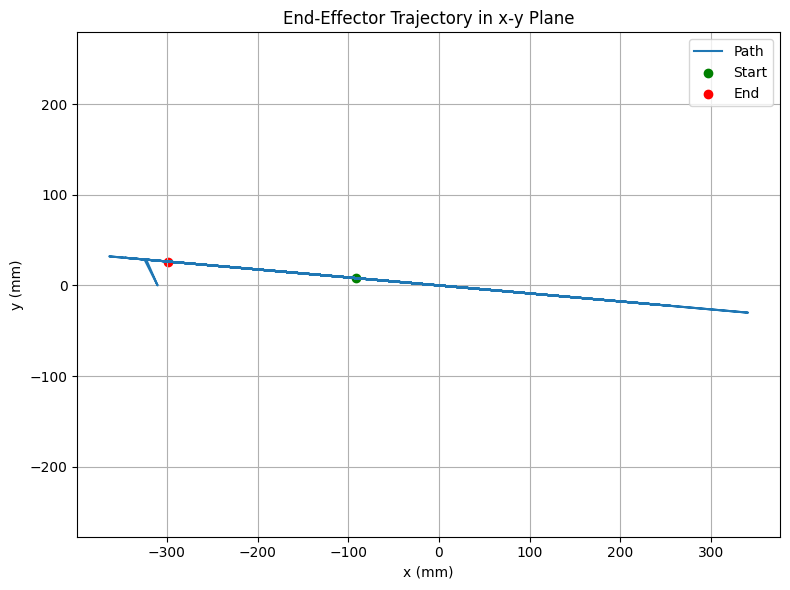

In [ ]:
# --- Plot 4: Task-space trajectory (x-y) ---
plt.figure(figsize=(8, 6))
plt.plot(xyz_mm[:, 0], xyz_mm[:, 1], "-", label="Trajectory")
plt.scatter(xyz_mm[0, 0], xyz_mm[0, 1], c="g", label="Start")
plt.scatter(xyz_mm[-1, 0], xyz_mm[-1, 1], c="r", label="End")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.title("End-Effector Trajectory in x-y Plane")
plt.grid(True)
plt.legend()
plt.axis("equal")
plt.tight_layout()
plt.savefig("lab2_xy_trajectory.png", dpi=150)

# plt.plot(xyz_mm[:, 0], xyz_mm[:, 1], "-", label="")
# # plt.plot(
# #     w_xyz[:, 0],
# #     w_xyz[:, 1],
# #     "o",
# #     markersize=10,
# #     color="orange",
# #     label="Waypoints",
# #     zorder=5,
# # )
# # for i, (xw, yw) in enumerate(zip(w_xyz[:, 0], w_xyz[:, 1]), start=1):
# #     plt.text(xw, yw, f" {i}", fontsize=12, fontweight="bold")
# plt.xlabel("x (mm)")
# plt.ylabel("y (mm)")
# plt.gca().set_aspect("equal", adjustable="box")
# plt.grid(True)
# plt.legend()
# plt.title("Task-Space Trajectory in x-y")
# plt.tight_layout()

In [ ]:


# --- Plot 4: Task-space trajectory (x-y) ---
plt.figure(figsize=(8, 6))
plt.plot(xyz_data[:, 0], xyz_data[:, 1], "o-", linewidth=3, markersize=8, label="Path")

# Mark each waypoint clearly
for i, (x, y) in enumerate(zip(xyz_data[:, 0], xyz_data[:, 1])):
    if i == 0:
        plt.scatter(x, y, c="green", s=100, label="Start", zorder=5)
    elif i == len(xyz_data) - 1:
        plt.scatter(x, y, c="red", s=100, label="End", zorder=5)
    else:
        plt.scatter(x, y, c="orange", s=80, zorder=5)
    plt.annotate(
        f"WP{i}", (x, y), xytext=(5, 5), textcoords="offset points", fontsize=10
    )

plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.title("End-Effector Trajectory in x-y Plane (Waypoint-based)")
plt.grid(True, alpha=0.7)
plt.legend()
plt.axis("equal")
plt.tight_layout()
plt.savefig("lab2_xy_trajectory.png", dpi=150)

In [ ]:
# --- Plot 4: Task-space trajectory (x-y) ---
plt.figure(figsize=(8, 6))
plt.plot(
    xyz_data[:, 0], xyz_data[:, 1], "o-", linewidth=3, markersize=8, label="Path"
)

# Mark each waypoint clearly
for i, (x, y) in enumerate(zip(xyz_data[:, 0], xyz_data[:, 1])):
    if i == 0:
        plt.scatter(x, y, c="green", s=100, label="Start", zorder=5)
    elif i == len(xyz_data) - 1:
        plt.scatter(x, y, c="red", s=100, label="End", zorder=5)
    else:
        plt.scatter(x, y, c="orange", s=80, zorder=5)
    plt.annotate(
        f"WP{i}", (x, y), xytext=(5, 5), textcoords="offset points", fontsize=10
    )

plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.title("End-Effector Trajectory in x-y Plane (Waypoint-based)")
plt.grid(True, alpha=0.7)
plt.legend()
plt.axis("equal")
plt.tight_layout()
plt.savefig("lab2_xy_trajectory.png", dpi=150)

plt.show()

# Shutdown
robot.close()
print("\nRobot motion complete and connection closed.")

